# Maxpooling Layers

This notebook helps in visualizing how maxpooling layers function in CNN for edge detection
* Step1: Define a CNN using PyTorch
* Step2: Input Image
* Step3: Apply CNN + ReLU activation
* Step4: Apply Maxpooling 2x2
* Step5: Apply Fully connected layer
* Step6: Visualize each of the layers

![Maxpooling Net](notebook_ims/CNN_all_layers.png)


## Import and Visualize how original image looks

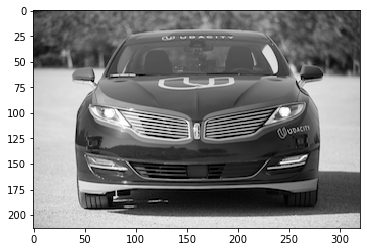

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img_path = 'data/udacity_sdc.png'
bgr_img = cv2.imread(img_path)
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_img, cmap='gray')

## Normalize & Rescale the image pixels in range [0, 1]

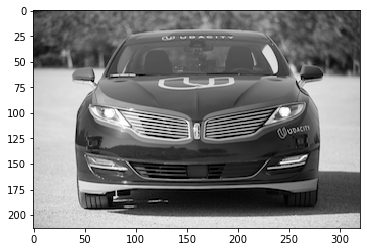

In [2]:
gray_img = gray_img.astype('float32')/255
plt.imshow(gray_img, cmap='gray')

## Define and visualize filters

In [3]:
import numpy as np
filter_vals = np.array([
    [-1, -1, 1, 1],
    [-1, -1, 1, 1],
    [-1, -1, 1, 1],
    [-1, -1, 1, 1]
])

filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3

filters = np.array([
    filter_1,
    filter_2,
    filter_3,
    filter_4
])

print(f'num of filters = {filters.shape[0]}, per filter size = {filters.shape[1:]}')



num of filters = 4, per filter size = (4, 4)


## Define network with convolution and pooling layers

![](notebook_ims/maxpooling_ex.png)

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [5]:
class CNN(nn.Module):
    def __init__(self, weight):
        super(CNN, self).__init__()
        kernel_height, kernel_width = weight.shape[2:]
        self.conv = nn.Conv2d(1, 4, kernel_size=(kernel_height, kernel_width), bias=False)
        self.conv.weight = nn.Parameter(weight)
        self.pool = nn.MaxPool2d(2, 2)
        
        
    def forward(self, x):
        convolved_x = self.conv(x)
        activated_x = F.relu(convolved_x)
        pooled_x = self.pool(activated_x)
        
        return convolved_x, activated_x, pooled_x


In [6]:
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = CNN(weight)
model

CNN(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

## Visualize each of the layers

In [24]:

def viz_layer(layer, n_filters=4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1)
        ax.imshow(np.squeeze(layer[0, i].data.numpy()), cmap='gray')
        ax.set_title(f'Output {i+1}')


torch.Size([1, 1, 213, 320])


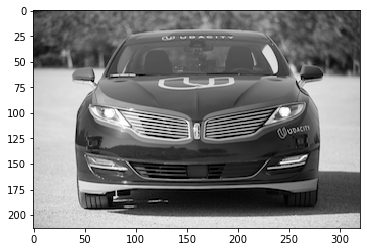

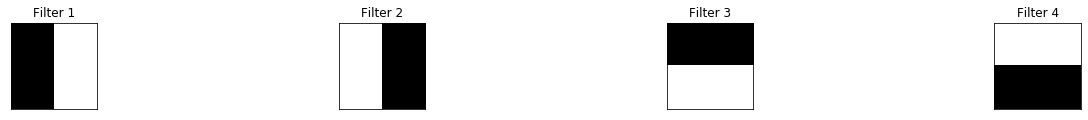

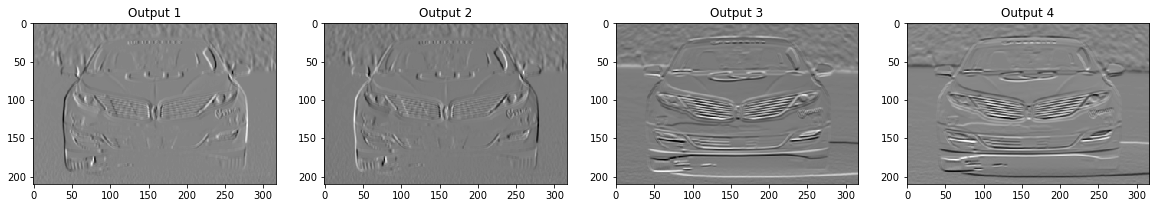

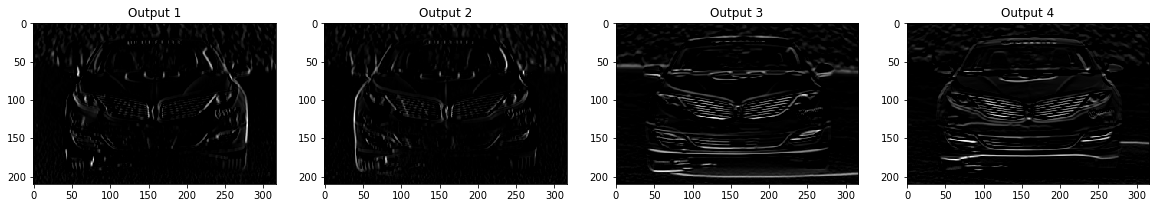

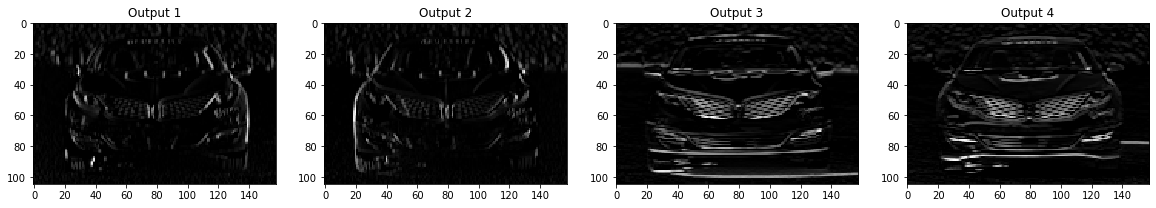

In [36]:
# Original image
plt.imshow(gray_img, cmap='gray')

# Plot the filters
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title(f'Filter {i+1}')

gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)
print(gray_img_tensor.shape)
conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)

viz_layer(conv_layer)
viz_layer(activated_layer)
viz_layer(pooled_layer)